In [49]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
from pandas import DataFrame as df
import itertools

In [50]:
dev = qml.device("default.qubit", wires=10)
s = "01001"
sNp = np.array([c for c in s], dtype=np.byte)

In [51]:
comb = list(itertools.product(np.array([0,1], dtype=np.byte), repeat=len(s)))
table = df()
table["x/y"] = comb
table["XORed"] = [tuple((a + sNp) % 2) for a in comb]

matches = table.reset_index().merge(
    table.reset_index(), 
    left_on="x/y", 
    right_on="XORed", 
    suffixes=('_left', '_right')
)

# Filter out cases where the match is in the same row
matches = matches[matches['index_left'] != matches['index_right']]
matches = matches[matches['index_left'] < matches['index_right']]

# Output the pairs of matching indices
result = matches[['index_left', 'index_right']].reset_index(drop=True)
result["diff"] = abs(result["index_left"] - result["index_right"])

perm = list(itertools.product(np.array([0,1], dtype=np.byte), repeat=len(s)-1))
specificMap = {9: np.byte(0), 7: np.byte(1)}
result["f(x)"] = [np.append(p, specificMap[c]) for (p,c) in zip(perm, result["diff"])]

arr = [0]*len(table)
for index, row in result.iterrows():
    arr[row["index_left"]] = row["f(x)"]
    arr[row["index_right"]] = row["f(x)"]
table["f(X)"] = arr
table

,x/y,XORed,f(X)
0,"(0, 0, 0, 0, 0)","(0, 1, 0, 0, 1)","[0, 0, 0, 0, 0]"
1,"(0, 0, 0, 0, 1)","(0, 1, 0, 0, 0)","[0, 0, 0, 1, 1]"
2,"(0, 0, 0, 1, 0)","(0, 1, 0, 1, 1)","[0, 0, 1, 0, 0]"
3,"(0, 0, 0, 1, 1)","(0, 1, 0, 1, 0)","[0, 0, 1, 1, 1]"
4,"(0, 0, 1, 0, 0)","(0, 1, 1, 0, 1)","[0, 1, 0, 0, 0]"
5,"(0, 0, 1, 0, 1)","(0, 1, 1, 0, 0)","[0, 1, 0, 1, 1]"
6,"(0, 0, 1, 1, 0)","(0, 1, 1, 1, 1)","[0, 1, 1, 0, 0]"
7,"(0, 0, 1, 1, 1)","(0, 1, 1, 1, 0)","[0, 1, 1, 1, 1]"
8,"(0, 1, 0, 0, 0)","(0, 0, 0, 0, 1)","[0, 0, 0, 1, 1]"
9,"(0, 1, 0, 0, 1)","(0, 0, 0, 0, 0)","[0, 0, 0, 0, 0]"


In [52]:
def specificUf():
    qml.CNOT(wires=[0,5])
    qml.CNOT(wires=[2,6])
    qml.CNOT(wires=[3,7])

    qml.CNOT(wires=[1,8])
    qml.CNOT(wires=[4,8])
    
    qml.CNOT(wires=[1,9])
    qml.CNOT(wires=[4,9])

@qml.qnode(dev)
def simon(s):
    sNp = [np.byte(c) for c in s]
    [qml.Hadamard(wire) for wire in list(range(0,len(s)))]
    # [qml.X(wires=len(s) + wire) for wire in np.where(sNp == np.byte(1))[0]]
    # [qml.CNOT(wires=[a,b]) for a,b in zip(list(range(0,len(s))), list(range(len(s), 2*len(s))))]
    specificUf()
    [qml.Hadamard(wire) for wire in list(range(0,len(s)))]
    return qml.probs(wires=list(range(0,len(s))))

/tmp/ipykernel_21037/449202592.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


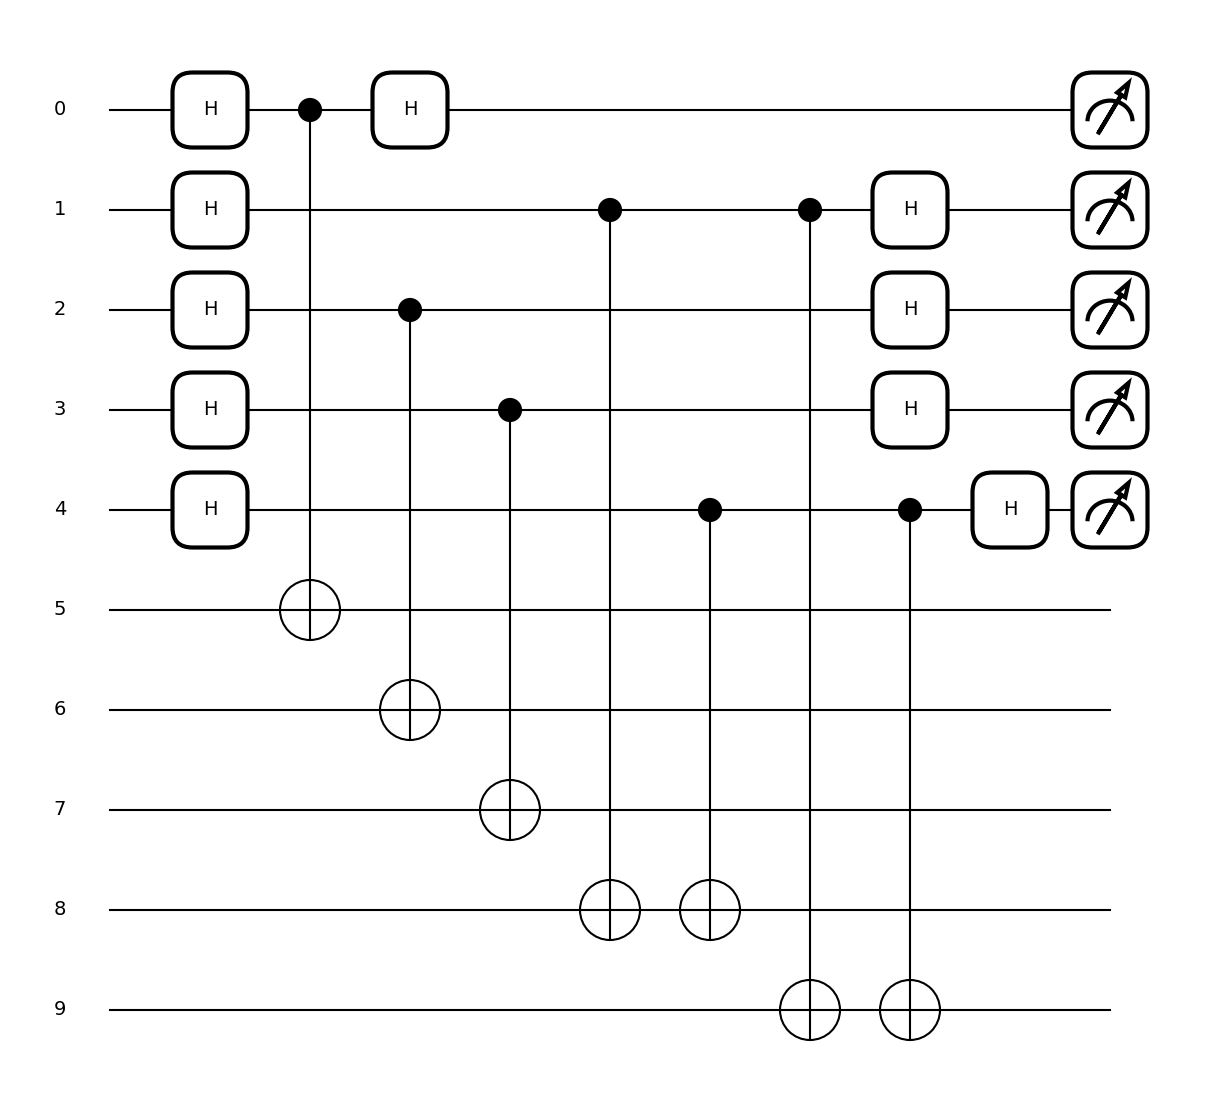

In [53]:
fig, ax = qml.draw_mpl(simon)(s)
fig.show()

In [ ]:
simon(s)
# c=01001
# <00000,c>=0
# <00010,c>=0
# <00100,c>=0
# <00110,c>=0
# <01001,c>=0
# <01011,c>=0 
# <01101,c>=0 
# <01111,c>=0 
# <10000,c>=0 
# <10010,c>=0 
# <10100,c>=0 
# <10110,c>=0 
# <11001,c>=0 
# <11011,c>=0 
# <11101,c>=0 
# <11111,c>=0 

tensor([0.0625, 0.    , 0.0625, 0.    , 0.0625, 0.    , 0.0625, 0.    ,
        0.    , 0.0625, 0.    , 0.0625, 0.    , 0.0625, 0.    , 0.0625,
        0.0625, 0.    , 0.0625, 0.    , 0.0625, 0.    , 0.0625, 0.    ,
        0.    , 0.0625, 0.    , 0.0625, 0.    , 0.0625, 0.    , 0.0625], requires_grad=True)